# Objective

To review key ideas of probability and sampling

## Preliminaries

In [1]:
! pip install yfinance

     |████████████████████████████████| 6.3MB 18.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=06d1478dc738702db786619da4b826c6b2bbfe2e24880ef6007f434dd8d1874e
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

#Data

In [3]:
axisbank_data = yf.download('AXISBANK.NS').reset_index()

[*********************100%***********************]  1 of 1 completed


In [4]:
axisbank_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-11-27,3.55,3.55,2.71,3.40,2.261181,21000
1,1998-11-30,3.25,3.30,3.10,3.21,2.134820,132000
2,1998-12-01,3.29,3.46,3.22,3.39,2.254530,123500
3,1998-12-02,3.36,3.44,3.32,3.39,2.254530,75500
4,1998-12-03,3.44,3.49,3.37,3.39,2.254530,102000


# Sampling

Sampling, that is, extracting a subset of a population of interest and observing their characteristics is a crucial first step in undertaking *inference*. Here, we infer the parameters of the population from that of the sample.

## Random sampling

For statistical guarantees to kick-in random sampling is necessary. In the context of random sampling, every unit in the population has an equal chance of being included into the sample.


## Sampling variation

When we make inferences about the population using the sample, we need guarantees that the sample characteristics will hold even with repeated sampling. The variation we expect to observe in repeated sampling from the population is called sampling variation.

# Probability

We are interested in an empirical view of probability, that is, likelihood of occurence of an event of interest over repeated trials. This view fits in naturally with the notion of sampling and sampling variation. 

For example, we will speak of the probabilities of events such as "If the population mean is 10, what is the probability that a sample mean is 25 or more?".

## Conditional probability

A central concept in ML is conditional probability, that is, the probability that the outcome $Y$ is observed given a set of features $X$. All ML involvee the estimation of $\mathbf{P}(Y | \mathbf{X})$.

Formally:

$$
\mathbf{P}(Y|X) = \dfrac{\mathbf{P}(Y \cap X)}{\mathbf{P}(X)}
$$
## Independence

Independence ensures that there is no 'interaction' between the units of observation. For example, when we are predicting the outcome $Y$, from a set of features $X_1, X_2, \ldots, X_n$, we require that:

$$
\mathbf{P}(X_1 | X_2, X_3, \ldots, X_n)=P(X_1)
$$

Practically, this means that each row of our data frame is independent of each other.


## Bayes' theorem

$$
\mathbf{P}(B|A) = \dfrac{\mathbf{P}(A|B) \mathbf{P}(B)}{\mathbf{P}(A)}
$$

# Study 1

Using the **full** Axis bank data compute the following employing the empirical notion of probability:

- What is the probability that an inter-day closing price difference is more than 2.5?
- What is the probability that an inter-day closing price difference is less than -1.5?
- What is the probability that an inter-day closing price difference is more than 2.5 or less than -1.5?

What do you infer based on these values?

In [5]:
axisbank_diff_data = axisbank_data.diff()

In [6]:
axisbank_diff_data.Close.describe()

count    5616.000000
mean        0.121368
std         7.352800
min      -119.500000
25%        -1.635002
50%         0.000000
75%         1.930000
max        80.399963
Name: Close, dtype: float64

In [7]:
(axisbank_diff_data.query(f"Close > 2.5")
                   .shape[0])

1251

In [8]:
(axisbank_diff_data.query(f"Close < -1.5")
                   .shape[0])

1440

In [9]:
1251/5616

0.22275641025641027

In [10]:
1440/5616

0.2564102564102564

# Study 2

Using a **random sample of size 500**, answer the questions posed in Study 1

In [11]:
axisbank_diff_sample = axisbank_diff_data.sample(500)

In [12]:
axisbank_diff_sample.Close.describe()

count    500.000000
mean      -0.018400
std        7.554649
min      -45.850037
25%       -2.114998
50%        0.000000
75%        2.182503
max       43.599976
Name: Close, dtype: float64

In [13]:
(axisbank_diff_sample.query(f"Close > 2.5")
                     .shape[0])

114

In [14]:
(axisbank_diff_sample.query(f"Close < -1.5")
                     .shape[0])

134

In [15]:
109/500

0.218

In [16]:
126/500

0.252

# Study 3

Repeat Study 2 1000 times. What is the distribution of the probability of the inter-day closing price being more than 2.5 across these 1000 repetitions? Summarize the probabilities you observe.

In [17]:
probability_estimates = []

for iteration in range(1000):
  axisbank_diff_sample = axisbank_diff_data.sample(500)
  p_estimated = (axisbank_diff_sample.query(f"Close > 2.5")
                                     .shape[0])/500

  probability_estimates.append(p_estimated)

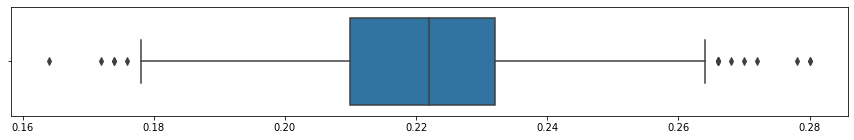

In [18]:
plt.figure(figsize=(15,2 ))
sns.boxplot(x=probability_estimates)

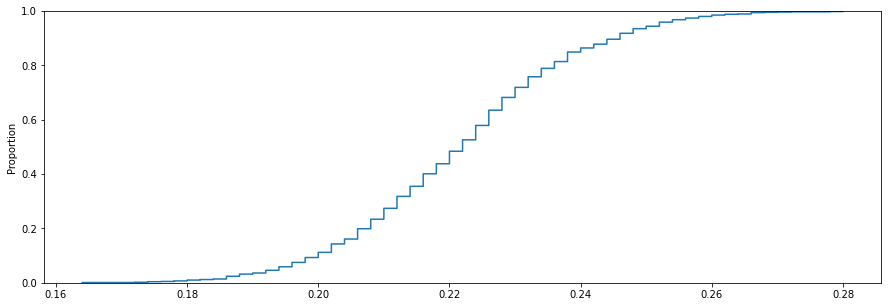

In [19]:
plt.figure(figsize=(15,5))
sns.ecdfplot(probability_estimates)

In [20]:
np.mean(probability_estimates)

0.22171000000000005

In [21]:
np.std(probability_estimates)

0.01757475177634097

# Summary

1. Random samples are a powerful method to infer characteristics about a population

2. When used in an empirical sense, probability of an event can indicate the likelihood of the event occuring over *repeated independent trials*

3. Sampling distribution is a reflection of the expected variation in the estimate obtained from a sample